# Building A Handwritten Digits Classifier

In this Project, I'll explore the effectiveness of deep, feedforward neural networks at classifying images.

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digits = pd.DataFrame(load_digits().data)
targets = pd.DataFrame(load_digits().target)

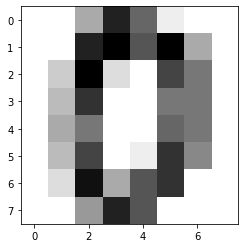

In [3]:
first_image = digits.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8, 8)
plt.imshow(np_image, cmap='gray_r')

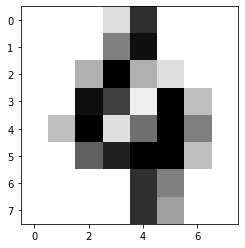

In [4]:
first_image = digits.iloc[100]
np_image = first_image.values
np_image = np_image.reshape(8, 8)
plt.imshow(np_image, cmap='gray_r')

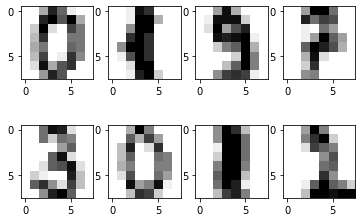

In [5]:
f, axarr = plt.subplots(2, 4)

axarr[0, 0].imshow(digits.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(digits.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(digits.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(digits.iloc[299].values.reshape(8,8), cmap='gray_r')

axarr[1, 0].imshow(digits.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(digits.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(digits.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(digits.iloc[1299].values.reshape(8,8), cmap='gray_r')

## K-Nearest Neighbors Model

In [24]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

scores = []
# targets = targets.values.ravel()

for i in range(1,10):
    score = cross_validate(KNeighborsClassifier(n_neighbors=i), digits,targets,scoring='accuracy', cv=4)
    scores.append(score['test_score'])
    
k_overall_accuracies = []

for row in scores:
    k_overall_accuracies.append(np.mean(row))

In [25]:
k_overall_accuracies

[0.967724573125464,
 0.9632727047760454,
 0.9632764167285326,
 0.9643924771096264,
 0.9627233358079683,
 0.9604949269982678,
 0.9582714674585499,
 0.9571566443949517,
 0.9566060381093788]

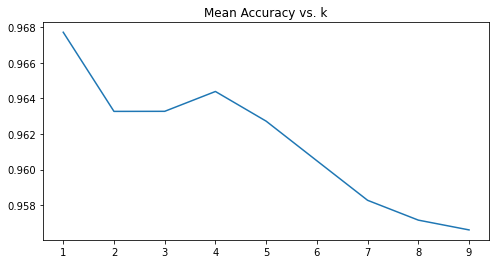

In [19]:
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. k")
plt.plot(list(range(1,10)), k_overall_accuracies)

## Neural Network With One Hidden Layer

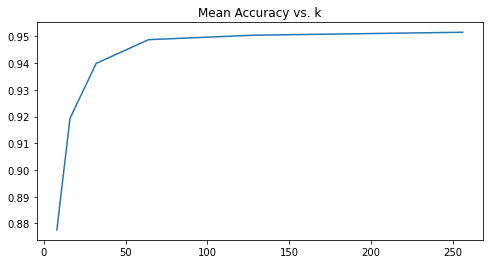

In [27]:
from sklearn.neural_network import MLPClassifier
neurons = [8,16,32,64,128,256]

scores = []

for x in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(x,),activation='logistic',max_iter=3000)
    score = cross_validate(mlp, digits,targets,scoring='accuracy', cv=4)
    scores.append(score['test_score'])
    
k_overall_accuracies = []

for row in scores:
    k_overall_accuracies.append(np.mean(row))
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. k")
plt.plot(neurons, k_overall_accuracies)
plt.show()

In [21]:
k_overall_accuracies

[0.8903637713437268,
 0.921526849789656,
 0.9337738183617916,
 0.9454627567433803,
 0.9482405345211581,
 0.952136847315021]

## Summary:
It looks like adding more neurons to the single hidden layer did not improve the simple accuracy by much. Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

Given that k-nearest neighbors achieved approximately `97%` accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.

## Neural Network With Two Hidden Layers

In [45]:
scores = []
for x in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(x,x),activation='logistic',max_iter=3000)
    score = cross_validate(mlp, digits,targets,scoring='accuracy', cv=4)
    scores.append(score['test_score'])
    
k_overall_accuracies = []

for row in scores:
    k_overall_accuracies.append(np.mean(row))

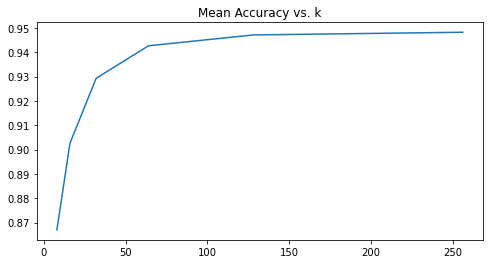

In [46]:
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. k")
plt.plot(neurons, k_overall_accuracies)
plt.show()

## Summary
Using 2 hidden layers did not improve the simple accuracy.

## Neural Network With Three Hidden Layers

In [40]:
scores = []
for x in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(x,x,x),activation='logistic',max_iter=3000)
    score = cross_validate(mlp, digits,targets,scoring='accuracy', cv=6)
    scores.append(score['test_score'])
    
k_overall_accuracies = []

for row in scores:
    k_overall_accuracies.append(np.mean(row))

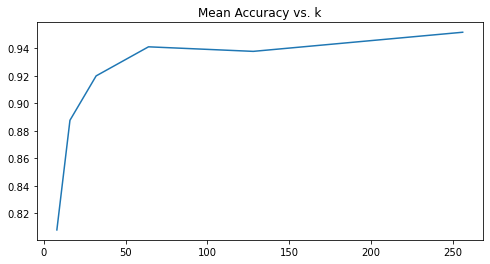

In [43]:
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. k")
plt.plot(neurons, k_overall_accuracies)
plt.show()

In [44]:
k_overall_accuracies

[0.807991452991453,
 0.8876347082868823,
 0.9198792270531402,
 0.9410033444816054,
 0.9376960237829802,
 0.9515886287625418]

## Summary
Using 3 hidden layers returned a simple accuracy of `95%`, even with 6-fold cross validation.